Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


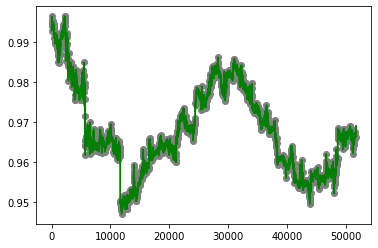

In [ ]:
# from numpy import extract
from google.colab import drive 
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def getdata(path):
    excel_test_data =  pd.read_excel(path)
    return pd.DataFrame(excel_test_data, columns=['CHART SYMBOL','OPEN','HIGH','LOW','CLOSE','Time','i','MAX EXTREMUM','MIN EXTREMUM'])
def Is_PullBack(val,index):
      extrema = np.array(val.split(),dtype=float)
    extrema_index = np.array(index.split(),dtype=np.int32)
    e6= extrema[-1]
    #e6_index = extrema_index[-1]
    for i in range(len(extrema)-2,0,-1):
        e5 = extrema[i]
        e5_index = extrema_index[i]
        if e5>=e6: 
            return '0'
        for j in range(i-1,0,-1):
            e4 = extrema[j]
            e4_index = extrema_index[j]
            flag= False
            for z in range(i,j,-1):
                if e5<extrema[z]:
                    flag=True
                    break
            if flag:
                continue
            if e5>=e4 or e4<=e6 or e6<=(e5+e4)/2: 
                continue
            for k in range(j-1,0,-1):
                e3 = extrema[k]
                e3_index = extrema_index[k]

                if e3>=e4 or e3>=e5 or e3>=e6 :
                    continue
                for l in range(k-1,0,-1):
                    e2 = extrema[l]
                    e2_index = extrema_index[l]
                    flag= False
                    for z in range(j-1,l,-1):
                        if e2<extrema[z]:
                            flag=True
                            break
                    if flag:
                        continue
                    if e2<=e3 or e2>=e4 or e2<=e5 :
                        continue
                    for m in range(l-1,-1,-1):
                        e1 = extrema[m]
                        e1_index = extrema_index[m]
                        flag= False
                        for z in range(k-1,m,-1):
                            if e1>=extrema[z]:
                                flag=True
                                break
                        if flag:
                            continue
                        if e1>=e2 or e1>=e3:
                            continue
                        else:
                            # return str(e6_index)+' '+str(e5_index)+' '+str(e4_index)+' '+str(e3_index)+' '+str(e2_index)+' '+str(e1_index)
                            return str(e5_index)+' '+str(e4_index)+' '+str(e3_index)+' '+str(e2_index)+' '+str(e1_index)
    return str(0)
def find_pullback(window):
    data= getdata('/content/drive/MyDrive/Dataset/Exterms.xlsx')
    data.iloc[:,2].plot(color='green')
    data.iloc[:,3].plot(color='green')
    Max = data.loc[(data['MAX EXTREMUM'])!=0].index.tolist()
    Min =data.loc[(data['MIN EXTREMUM'])!=0].index.tolist()
    Exterma_Value = pd.concat([data.loc[Max, 'HIGH'], data.loc[Min, 'LOW']]).sort_index()
    plt.scatter(Exterma_Value.index,Exterma_Value.values,color='gray')

    for i in range(window,len(Exterma_Value)):
        _strVal=''
        _strindex=''
        sub_Exterma = Exterma_Value.iloc[i-window:i-1] 
        for k in range (0,len(sub_Exterma )-1):
            _strVal = _strVal + ' '+ str(k)
            _strindex = _strindex + ' '+ str(sub_Exterma.index[k])
            # _strindex = _strindex + ' '+ str(sub_Exterma.index[k])
        for zz in range (sub_Exterma.index[k]+1 , sub_Exterma.index[k+1]):
            k = Is_PullBack(_strVal+ ' ' +str(data.loc[zz,'LOW']),_strindex+ ' '+ str(zz))
            
            if k != '0':
                print(k)
                extrema_index = np.array(k.split(),dtype=np.int32)
                plt.scatter(extrema_index, Exterma_Value[extrema_index], color='red')
                plt.scatter(data.loc[zz,'LOW'], zz, color='yellow')
                break
    plt.show()
            
find_pullback(10)
# Exterma = Max+Min
# Exterma.sort()
# print (Exterma)